In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import plotly.graph_objects as go 

import cufflinks as cf
cf.go_offline()

In [2]:
# Loading dataset
coal_2013=pd.read_excel('coalpublic2013.xls',header=3) # year 2013
coal_2014=pd.read_excel('coalpublic2014.xls',header=3) # year 2014
coal_2015=pd.read_excel('coalpublic2015.xls',header=3) # year 2015
coal_2016=pd.read_excel('coalpublic2016.xls',header=3) # year 2016
coal_2017=pd.read_excel('coalpublic2017.xls',header=3) # year 2017
test=pd.read_excel('coalpublic2018.xls',header=3) # taking it as test to predict 2018 coal production

In [3]:
# Checking 2013 Coal Production set
coal_2013.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784


In [4]:
# Checking 2014 Coal Production set
coal_2014.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2014,103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,71758,6,10494
1,2014,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",United Mine Workers Of America,Appalachia Southern,0,10,20144
2,2014,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,40263,17,27476


In [5]:
# Checking 2015 Coal Production set
coal_2015.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2015,103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
1,2015,103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
2,2015,103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729


In [6]:
# Checking 2016 Coal Production set
coal_2016.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2016,103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,37786,6,14235
1,2016,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Yellowhammer Energy Solutions,","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,43155,21,13278
2,2016,103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,22218,19,11158


In [7]:
# Checking 2017 Coal Production set
coal_2017.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2017,103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,88362,5,8694
1,2017,103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,Birmingham Coal & Coke Company,"912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,7063,9,8492
2,2017,100329,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,49,83792


In [8]:
# Checking test dataset
test.head(3)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2018,103381,Jesse Creek H.W.M.,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Camellia Met Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,113221,16,38882
1,2018,100329,Oak Grove Preparation Plant,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Murray Oak Grove Coal Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,59,135296
2,2018,100627,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","P.O. Box 1608, Jasper, AL 35502",NaN,Appalachia Southern,278489,43,122091


# 1. Exploratory Data Analysis

In [9]:
# Number of rows and columns in each set
x=2013
for i in (coal_2013,coal_2014,coal_2015,coal_2016,coal_2017):
    print('coal_',x,i.shape)
    x+=1

coal_ 2013 (1450, 16)
coal_ 2014 (1360, 16)
coal_ 2015 (1171, 16)
coal_ 2016 (993, 16)
coal_ 2017 (942, 16)


In [10]:
# Checking if all the dataframe are having same column names 
for i in (coal_2013,coal_2014,coal_2015,coal_2016):
    for j in (coal_2014,coal_2015,coal_2016,coal_2017):
        print(i.columns==j.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  Tr

* Columns names are identical

In [11]:
# Concatenating to one dataframe
coal_production=pd.concat([coal_2013,coal_2014,coal_2015,coal_2016,coal_2017],axis=0)

# selecting those samples which have non zero production
coal_production=coal_production[coal_production['Production (short tons)']>0]

coal_production.head() # checking

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [12]:
# Column information, row information and object types
coal_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 941
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       4289 non-null   int64 
 1   MSHA ID                    4289 non-null   int64 
 2   Mine Name                  4289 non-null   object
 3   Mine State                 4289 non-null   object
 4   Mine County                4289 non-null   object
 5   Mine Status                4289 non-null   object
 6   Mine Type                  4289 non-null   object
 7   Company Type               4289 non-null   object
 8   Operation Type             4289 non-null   object
 9   Operating Company          4289 non-null   object
 10  Operating Company Address  4289 non-null   object
 11  Union Code                 1276 non-null   object
 12  Coal Supply Region         4288 non-null   object
 13  Production (short tons)    4289 non-null   int64 
 14  Average E

In [13]:
# Checking for missing values
coal_production.isnull().sum()

Year                            0
MSHA ID                         0
Mine Name                       0
Mine State                      0
Mine County                     0
Mine Status                     0
Mine Type                       0
Company Type                    0
Operation Type                  0
Operating Company               0
Operating Company Address       0
Union Code                   3013
Coal Supply Region              1
Production (short tons)         0
Average Employees               0
Labor Hours                     0
dtype: int64

In [14]:
# 'Union Code' column is having to much null values, therefore droping the column
coal_production.drop('Union Code',axis=1,inplace=True)

In [15]:
# Checking number of unique values of categorical columns 
for i in coal_production.columns[coal_production.dtypes=='object']:
    print(i,':',coal_production[i].nunique())

Mine Name : 1411
Mine State : 29
Mine County : 172
Mine Status : 5
Mine Type : 3
Company Type : 3
Operation Type : 2
Operating Company : 1056
Operating Company Address : 985
Coal Supply Region : 8


* Column 'Mine Name', 'Operating Company' and 'Operating Company Address' are having lots of variable 
* Further analysis needed for 'Mine County' to minimize the variables 

## 1.1 Sum of Production , average employees and labor hours and their percentage change in each year

In [16]:
# Making Table [year--Production sum--Average employees sum--Labor hour sum]
Year=coal_production.groupby('Year')[['Production (short tons)', 'Labor Hours']].sum()
Year['Average Employees']=coal_production.groupby('Year')[['Average Employees']].mean()

# Making percentage change columns and adding it to the table
Percent_change=['Percent_change_production', 'Percent_change_Labor_Hours', 'Percent_change_Average_Employees']
columns=['Production (short tons)', 'Labor Hours', 'Average Employees']

for _change_ , col in zip(Percent_change, columns):
    change=[np.nan]
    for year in np.arange(2013, 2018):
        if year==2017:
            break
        change.append(round((Year.loc[year+1, col]-Year.loc[year, col])/Year.loc[year, col]*100,2))
    Year[_change_]=change

Year # Output

,Production (short tons),Labor Hours,Average Employees,Percent_change_production,Percent_change_Labor_Hours,Percent_change_Average_Employees
Year,,,,,,
2013,984841779,165247382,70.372290,NaN,NaN,NaN
2014,1000048758,156069419,70.682234,1.54,-5.55,0.44
2015,896940563,132751118,71.893318,-10.31,-14.94,1.71
2016,728364498,102544647,67.664789,-18.79,-22.75,-5.88
2017,774609357,110425830,72.466176,6.35,7.69,7.10


In [17]:
# Visualization
Year[['Percent_change_production',
      'Percent_change_Average_Employees',
      'Percent_change_Labor_Hours']].iplot(mode='lines+markers',
                                           title=('Percentage change in Production of coal, Average Employees number and Labor hours'))

* There is a continuous fall in coal production from year 2014 up untill year 2016 and after that a rise in production is seen in year 2017
* There is fall in labor hour in year 2015 but after that it increases till year 2017
* The only thing increases in year 2015 is average number of employees and than it decreases and again increases
* The rate of percent increase is greater than that of percent decrease
* The demand of coal has increased in year 2017. It may be either more new industries setups or increase of demand indirect products. 

## 1.2 Sum of Production , average employees and labor hours and their percentage change in each year and in each state

In [18]:
pd.options.display.float_format='{:.2f}'.format  # Set output upto 2 decimal place 

# Making Table [Mine State--Production sum]
state_production=pd.pivot_table(index='Mine State',
                                columns='Year',
                                values='Production (short tons)',
                                data=coal_production,
                                aggfunc='sum')

# Making percentage change columns
percent_change=[]
for year in range(2013, 2018):
    if year==2017:
        break
    percent_change.append(round((state_production[year+1]-state_production[year])/state_production[year]*100, 2))

# Renaming columns
state_production.rename(columns=lambda x : str(x)+'_sum', inplace=True) 

# Adding new columns to the existing table 
for _change_,year in zip(percent_change, range(2014, 2018)):
    state_production[year]=_change_

# Renaming new columns
state_production.rename(columns={2014:'%change_2014',2015:'%change_2015',2016:'%change_2016',2017:'%change_2017',},inplace=True)

# Resetting index
state_production.reset_index(inplace=True)

state_production # Output

Year,Mine State,2013_sum,2014_sum,2015_sum,2016_sum,2017_sum,%change_2014,%change_2015,%change_2016,%change_2017
0,Alabama,18620017.00,16362945.00,13190832.00,9642974.00,12860658.00,-12.12,-19.39,-26.90,33.37
1,Alaska,1631584.00,1501758.00,1177390.00,932122.00,959068.00,-7.96,-21.60,-20.83,2.89
2,Arizona,7602722.00,8050607.00,6804555.00,5422850.00,6221392.00,5.89,-15.48,-20.31,14.73
3,Arkansas,58578.00,93989.00,91462.00,49415.00,42738.00,60.45,-2.69,-45.97,-13.51
4,Colorado,24236286.00,24007495.00,18878915.00,12634136.00,15046510.00,-0.94,-21.36,-33.08,19.09
5,Illinois,52147193.00,57969300.00,56101030.00,43422136.00,48204145.00,11.16,-3.22,-22.60,11.01
6,Indiana,39101834.00,39266977.00,34295444.00,28766705.00,31471867.00,0.42,-12.66,-16.12,9.40
7,Kansas,22150.00,66366.00,199199.00,26788.00,nan,199.62,200.15,-86.55,nan
8,Kentucky (East),39500816.00,37390040.00,28100959.00,16771886.00,18178854.00,-5.34,-24.84,-40.32,8.39
9,Kentucky (West),40878963.00,39944683.00,33324002.00,26096012.00,23605558.00,-2.29,-16.57,-21.69,-9.54


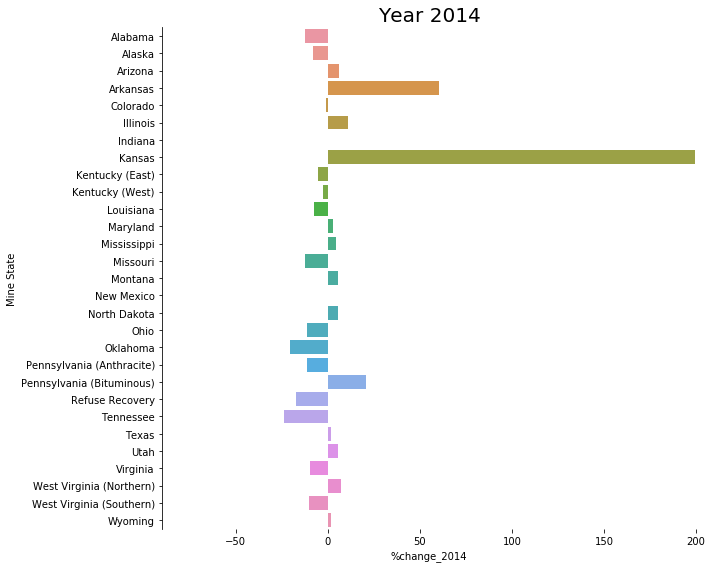

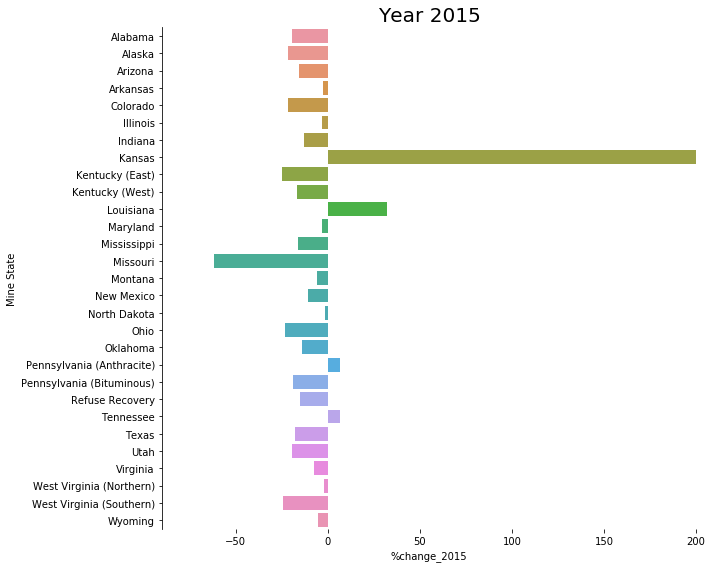

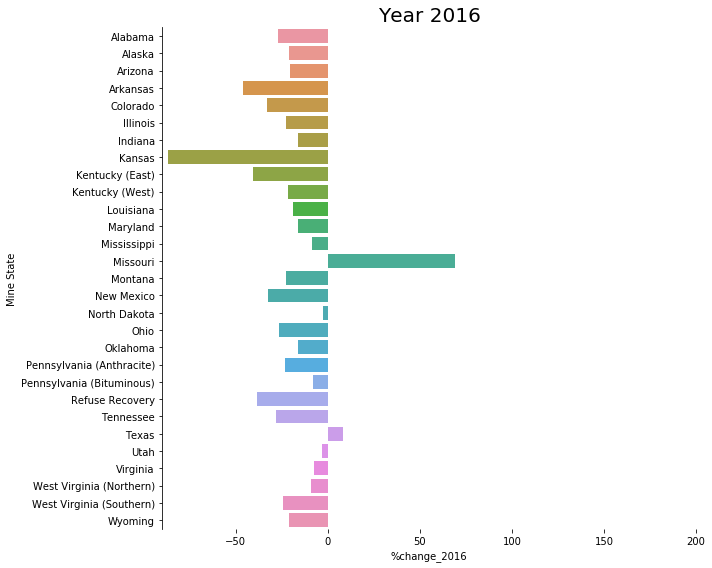

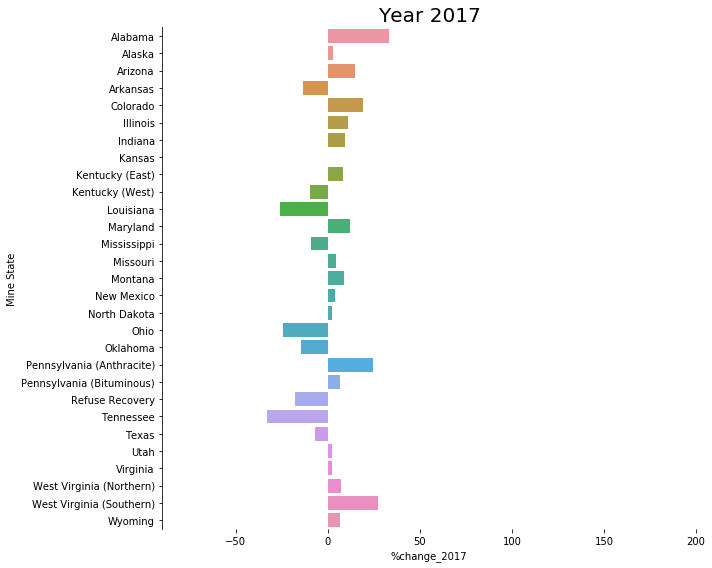

In [19]:
# Visualization of the above information [Horizontal bar chart]
x=2014
for col in ['%change_2014','%change_2015','%change_2016','%change_2017']:
    plt.figure(figsize=(10,8))
    sns.barplot(x=col,y='Mine State',orient='h',data=state_production)
    sns.despine(bottom=True)
    plt.title('Year '+str(x),fontdict={'fontsize':20})
    plt.xlim(-90,200)
    plt.tight_layout()
    plt.show()
    x+=1

* In year 2014, there are lots of state showing decrease in coal production but overall year 2014 shows an increase of 1.54 percent, this is because state 'Arkansas' and 'Kansas' had a major incerase in coal production and with some other states the overall years coal production rate increases.
* In year 2015, the overall coal production rate decreases and almost all the states shows a drop in rate except state Kansas whose rate of increase is same as previous year and is the largest.Louisiana,Pennsylvania and Tennessee are some of the state merge out to give positive rate from previous year showing negative rate.
* In year 2016, the largest drop in rate upto 18.79 and it is surprise to know that state 'Kansas' shows largest drop in coal production rate. State 'Missouri' achieves highest rate.
* Year 2017 shows an increase in production rate.Kansas state no longer produce coals and there is mixture of states showing an increase and decrease in production rate. 

## 1.3 Year wise Mine status

In [20]:
pd.options.display.float_format='{:.0f}'.format  # Set output to 0 decimal place for the table

# Making Table [Mine Status--Count]
mine_status=pd.pivot_table(index='Mine Status',
                           columns='Year',
                           data=coal_production,
                           values='Mine Name',
                           aggfunc='count')

# Visualization of the above information [Pie chart]
labels=mine_status.index.tolist()

for i in np.arange(2013,2018):
    if i==2018:
        break
    fig=go.Figure(data=[go.Pie(labels=labels,
                               values=mine_status[i],
                               name='Year '+str(i),
                               hoverinfo='label+value+percent+name',
                               hole=0.4)])
    
    fig.update_layout(title_text='Mine status',
                      annotations=[dict(text=str(i),
                                        x=0.5,
                                        y=0.5,
                                        font_size=20,
                                        showarrow=False)])
    
    fig.show()

mine_status # Output

Year,2013,2014,2015,2016,2017
Mine Status,,,,,
Active,746,685,530,541,536
"Active, men working, not producing",167,154,165,85,80
"New, under construction",1,1,nan,nan,1
Permanently abandoned,64,58,61,39,24
Temporarily closed,83,87,97,45,39


* From year 2013 upto year 2015 active mine count decreases from 70.3% to 62.1% and in year 2016 an increase upto 76.2% even though year 2016 had a largest drop in production rate. 
* We still have non producing active mines but it is good to see that their counts have decreased year wise.
* In year 2016, total Temporarily closed and Permanently abandoned mines were 11.83% which is less than previous year.

## 1.4 Year wise Mine types, total Production , average number of employees and labor hours 

In [21]:
# Making Table [Mine Status--Mine Type--count]
mine_type=pd.pivot_table(index=['Mine Status','Mine Type'],
                         columns='Year',
                         data=coal_production,
                         values='Mine Name',
                         aggfunc='count')

# Visualization of the above information [Pie chart]
labels=mine_type.index.tolist()

for i in np.arange(2013,2018):
    if i==2018:
        break
    fig=go.Figure(data=[go.Pie(labels=labels,
                               values=mine_type[i],
                               name='Year '+str(i),
                               hoverinfo='label+value+percent+name',
                               hole=0.4)])
    
    fig.update_layout(title_text='Mine Type',
                      annotations=[dict(text=str(i),
                                        x=0.5,y=0.5,
                                        font_size=20,
                                        showarrow=False)])
    
    fig.show()

mine_type # Output

Year                                            2013  2014  2015  2016  2017
Mine Status                        Mine Type                                
Active                             Refuse         18     9     9    10     3
                                   Surface       448   426   340   334   337
                                   Underground   280   250   181   197   196
Active, men working, not producing Refuse          7     7     3     2     2
                                   Surface        90    82    83    47    45
                                   Underground    70    65    79    36    33
New, under construction            Refuse          1   nan   nan   nan     1
                                   Surface       nan     1   nan   nan   nan
Permanently abandoned              Refuse          1     4     2     2     2
                                   Surface        35    35    31    23    16
                                   Underground    28    19    28    14     6
Temporarily closed                 Refuse          2     7     5     1     1
                                   Surface        64    69    75    38    36
                                   Underground    17    11    17     6     2

* Most of the active mines are of surface type and are in largest in number and second comes the underground types.
* The count of the active surface type mines and active undergroung type mines had decreased from year 2013 upto year 2015 and again increases. 

In [22]:
# Making Table [Mine type--Production Sum]
mine_type_prod=pd.pivot_table(index=['Mine Type'],
                              columns='Year',
                              data=coal_production,
                              values='Production (short tons)',
                              aggfunc='sum')

# Visualization of the above information [Pie chart]
labels=mine_type_prod.index.tolist()

for i in np.arange(2013,2018):
    if i==2018:
        break
    fig=go.Figure(data=[go.Pie(labels=labels,
                               values=mine_type[i],
                               name='Year '+str(i),
                               hoverinfo='label+value+percent+name',
                               hole=0.4)])
    
    fig.update_layout(title_text='Mine Type Production',
                      annotations=[dict(text=str(i),
                                        x=0.5,
                                        y=0.5,
                                        font_size=20,
                                        showarrow=False)])
    
    fig.show()
    
mine_type_prod # Output

Year,2013,2014,2015,2016,2017
Mine Type,,,,,
Refuse,1966269,1623609,1383746,850874,698828
Surface,641190957,643721158,588735515,475407370,500781669
Underground,341684553,354703991,306821302,252106254,273128860


* It seems that most coal producing mines are surface type followed by underground type and the last one is refuse type.
* The trend is same from year 2013 to year 2017

In [23]:
# Making Table [Mine type--Average number of employees]
mine_type_avg_emp=pd.pivot_table(index=['Mine Type'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Average Employees',
                                 aggfunc='mean')

# Renaming columns 
mine_type_avg_emp.rename(columns=lambda x : 'avg_emp '+str(x),inplace=True)

mine_type_avg_emp # Output

Year,avg_emp 2013,avg_emp 2014,avg_emp 2015,avg_emp 2016,avg_emp 2017
Mine Type,,,,,
Refuse,6,5,6,7,6
Surface,45,43,46,46,47
Underground,116,125,121,109,122


* It is very interesting to know the most coal producting mine type shows the second highest average number of employees and the highest number of employees work in Underground mine types.
* It indicates that surface type mines are much easier to extract coals than underground type

In [24]:
# Making Table [Mine type--Labor hours--average]
mine_type_lab_hr=pd.pivot_table(index=['Mine Type'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Labor Hours',
                                 aggfunc='mean')

# Renaming the columns 
mine_type_lab_hr.rename(columns=lambda x : 'Lab_hr_sum_ '+str(x),inplace=True)

mine_type_lab_hr # Output

Year,Lab_hr_sum_ 2013,Lab_hr_sum_ 2014,Lab_hr_sum_ 2015,Lab_hr_sum_ 2016,Lab_hr_sum_ 2017
Mine Type,,,,,
Refuse,11417,4550,8099,10222,7909
Surface,96930,93815,95241,94100,99677
Underground,261195,285327,269556,240313,283100


* The highest average number of employees will show the highest labor hours and here in no exception.
* Again it indicates that surface type mines are much easier to extract coals than underground type

In [25]:
# Making table [Mine state--Mine type--Mine Status--count]
Mine_state_type_status=pd.pivot_table(index=['Mine State','Mine Type','Mine Status'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='count')

# Resetting the index
Mine_state_type_status.reset_index(inplace=True)

print('Count of total number of Mines')

Mine_state_type_status # Output

Count of total number of Mines


Year,Mine State,Mine Type,Mine Status,2013,2014,2015,2016,2017
0,Alabama,Surface,Active,21,24,13,16,14
1,Alabama,Surface,"Active, men working, not producing",4,3,3,2,3
2,Alabama,Surface,Permanently abandoned,1,1,3,nan,nan
3,Alabama,Surface,Temporarily closed,5,1,10,5,6
4,Alabama,Underground,Active,7,7,5,6,7
...,...,...,...,...,...,...,...,...
133,West Virginia (Southern),Underground,Temporarily closed,8,6,5,2,nan
134,Wyoming,Surface,Active,16,15,15,15,15
135,Wyoming,Surface,Permanently abandoned,nan,nan,nan,nan,1
136,Wyoming,Surface,Temporarily closed,nan,2,nan,nan,nan


In [26]:
# Getting out the valuable information from the above table 
year=[2013, 2014, 2015, 2016, 2017]

for type in ['Surface', 'Underground']:
    max=Mine_state_type_status[Mine_state_type_status['Mine Type']==type].describe().iloc[-1, :].tolist()
    for year_, max_ in zip(year, max):
        print(year_, Mine_state_type_status[Mine_state_type_status[year_]==max_].iloc[:, [0, 1, 2]].values, max_)
    print('\n')

2013 [['Pennsylvania (Bituminous)' 'Surface' 'Active']] 99.0
2014 [['Pennsylvania (Bituminous)' 'Surface' 'Active']] 93.0
2015 [['Pennsylvania (Bituminous)' 'Surface' 'Active']] 74.0
2016 [['Pennsylvania (Bituminous)' 'Surface' 'Active']] 69.0
2017 [['Pennsylvania (Bituminous)' 'Surface' 'Active']] 59.0


2013 [['West Virginia (Southern)' 'Underground' 'Active']] 64.0
2014 [['Kentucky (East)' 'Underground' 'Active']] 53.0
2015 [['West Virginia (Southern)' 'Underground' 'Active']] 34.0
2016 [['West Virginia (Southern)' 'Underground' 'Active']] 43.0
2017 [['West Virginia (Southern)' 'Underground' 'Active']] 54.0




* State Pennsylvania had the highest number of Active Surface type mines from year 2013 till year 2017
* In year 2013, state having the highest number of Active Underground type mines was 'West Virginia (Southern)', in year 2014 state 'Kentucky (East)' took the position and from year 2015 upto 2017 state 'West Virginia (Southern)' have the highest number of  Active Underground type mines

In [27]:
# Making table [Mine state--Mine type--Mine Status--Production sum]
Mine_state_type_status_prod=pd.pivot_table(index=['Mine State','Mine Type','Mine Status'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='sum')

# Resetting the index
Mine_state_type_status_prod.reset_index(inplace=True)

print('Count of total number of Mines')

Mine_state_type_status_prod # Output

Count of total number of Mines


Year,Mine State,Mine Type,Mine Status,2013,2014,2015,2016,2017
0,Alabama,Surface,Active,4387349,3439975,2006644,1831697,2035285
1,Alabama,Surface,"Active, men working, not producing",470434,317563,519739,219014,94517
2,Alabama,Surface,Permanently abandoned,28807,14374,120808,nan,nan
3,Alabama,Surface,Temporarily closed,218542,74826,646314,158254,240099
4,Alabama,Underground,Active,12074770,12516207,7293287,7429998,10490757
...,...,...,...,...,...,...,...,...
133,West Virginia (Southern),Underground,Temporarily closed,299357,350780,230422,28263,nan
134,Wyoming,Surface,Active,383481212,392237368,372682329,296050867,314553716
135,Wyoming,Surface,Permanently abandoned,nan,nan,nan,nan,184928
136,Wyoming,Surface,Temporarily closed,nan,58000,nan,nan,nan


In [28]:
# Getting out the valuable information from the above table 
year=[2013, 2014, 2015, 2016, 2017]

for type in ['Surface', 'Underground']:
    max=Mine_state_type_status_prod[Mine_state_type_status_prod['Mine Type']==type].describe().iloc[-1, :].tolist()
    for year_, max_ in zip(year, max):
        print(year_, Mine_state_type_status_prod[Mine_state_type_status_prod[year_]==max_].iloc[:, [0, 1, 2]].values, max_)
    print('\n')

2013 [['Wyoming' 'Surface' 'Active']] 383481212.0
2014 [['Wyoming' 'Surface' 'Active']] 392237368.0
2015 [['Wyoming' 'Surface' 'Active']] 372682329.0
2016 [['Wyoming' 'Surface' 'Active']] 296050867.0
2017 [['Wyoming' 'Surface' 'Active']] 314553716.0


2013 [['Illinois' 'Underground' 'Active']] 45024799.0
2014 [['Illinois' 'Underground' 'Active']] 52713125.0
2015 [['Illinois' 'Underground' 'Active']] 48916492.0
2016 [['West Virginia (Northern)' 'Underground' 'Active']] 43160469.0
2017 [['West Virginia (Northern)' 'Underground' 'Active']] 45167779.0




* State Wyoming is the largest coal producing state from year 2013 upto year 2017, even though state State Pennsylvania had the highest number of Active Surface type mines from year 2013 till year 2017.
* In year 2013, 2014 and 2015 Illinois state had been the largest coal producing state, even though state West Virginia (Southern) and Kentucky (East) having the highest count of active underground mine types.
* In year 2016 and 2017, state 'West Virginia (Northern)' becomes the largest coal producing state and have the highest count of active underground mine types 

## 1.5 Year wise types of company 

In [29]:
# Making Table [Company type--Production count]
company_type=pd.pivot_table(index='Company Type',
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='count')

# Visualization of the above information [Pie chart]
labels=company_type.index.tolist()

for i in np.arange(2013,2018):
    if i==2018:
        break
    fig=go.Figure(data=[go.Pie(labels=labels,
                               values=company_type[i],
                               name='Year '+str(i),
                               hoverinfo='label+value+percent+name',
                               hole=0.4)])
    
    fig.update_layout(title_text='Company Type Market share',
                      annotations=[dict(text=str(i),
                                        x=0.5,
                                        y=0.5,
                                        font_size=20,
                                        showarrow=False)])
    
    fig.show()
    
company_type # Output

Year,2013,2014,2015,2016,2017
Company Type,,,,,
Contractor,39,38,5,3,5
Indepedent Producer Operator,725,709,660,534,532
Operating Subsidiary,297,238,188,173,143


* We have more independent organization than government organization in every year and the independent players have increased since year 2013.
* Year by year contractor are decreasing and least in year 2016

In [30]:
# Making Table [Company type--Production sum]
company_type_prod=pd.pivot_table(index='Company Type',
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='sum')

# Visualization of the above information [Pie chart]
labels=company_type_prod.index.tolist()

for i in np.arange(2013,2018):
    if i==2018:
        break
    fig=go.Figure(data=[go.Pie(labels=labels,
                               values=company_type_prod[i],
                               name='Year '+str(i),
                               hoverinfo='label+value+percent+name',
                               hole=0.4)])
    
    fig.update_layout(title_text='Company Type Production',
                      annotations=[dict(text=str(i),
                                        x=0.5,
                                        y=0.5,
                                        font_size=20,
                                        showarrow=False)])
    
    fig.show()
    
company_type_prod # Output

Year,2013,2014,2015,2016,2017
Company Type,,,,,
Contractor,10769067,9806409,1225977,898527,1229480
Indepedent Producer Operator,155193204,167238551,171678170,124544845,266204493
Operating Subsidiary,818879508,823003798,724036416,602921126,507175384


* A very unusual statistic is been observed, Independent Producer type companies which occupies largest market share produces coal less than government organization and this kind of data is seen in every year.
* For example let's say in year 2017 private playes captures 78.2% of the market share but produces only 34.4% of the total annual coal production and on the other hand government intervention to the market is only 21% but produces 65.5% of the total annual coal production.

## 1.6 Year wise type of operating plant

In [31]:
# Making table [Operation Type--Production sum]
operation_type=pd.pivot_table(index='Operation Type',
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='sum')

# Visualization
operation_type.iplot(kind='bar',title='Operation type Coal Production')

operation_type # Output

Year,2013,2014,2015,2016,2017
Operation Type,,,,,
Mine and Preparation Plant,565739127,578802016,531002147,429022686,454597592
Mine only,419102652,421246742,365938416,299341812,320011765


In [32]:
pd.options.display.float_format='{:.2f}'.format # Set output upto 2 decimal place

# Making table [Company type--operation type--Production percentage]    
company_operation_prod_percent=pd.pivot_table(index=['Company Type','Operation Type'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='sum')

# Resetting the index
company_operation_prod_percent.reset_index(inplace=True)

for year in np.arange(2013,2018):
    if year==2018:
        break
    percent=[]
    for index in np.arange(0,6):
        if index==6:
            break
        percent.append(round((company_operation_prod_percent[year][index]/company_operation_prod_percent[year].sum())*100,2))
    company_operation_prod_percent[year]=percent
 
print('Percentage Production by company type and their operation type')

company_operation_prod_percent # Output

Percentage Production by company type and their operation type


Year,Company Type,Operation Type,2013,2014,2015,2016,2017
0,Contractor,Mine and Preparation Plant,0.11,0.01,nan,nan,nan
1,Contractor,Mine only,0.98,0.97,0.14,0.12,0.16
2,Indepedent Producer Operator,Mine and Preparation Plant,5.35,5.49,6.89,6.87,14.88
3,Indepedent Producer Operator,Mine only,10.41,11.23,12.25,10.22,19.49
4,Operating Subsidiary,Mine and Preparation Plant,51.99,52.37,52.31,52.03,43.81
5,Operating Subsidiary,Mine only,31.16,29.92,28.41,30.75,21.66


* Most of the coal is produced from plants who are extracting and treating coal both and the major players are government organization

In [33]:
# Making table [Company type--operation type--Count percentage]   
company_operation_count_percent=pd.pivot_table(index=['Company Type','Operation Type'],
                                 columns='Year',
                                 data=coal_production,
                                 values='Production (short tons)',
                                 aggfunc='count')

# Resetting the index
company_operation_count_percent.reset_index(inplace=True)

# Getting the percentage
for year in np.arange(2013,2018):
    if year==2018:
        break
    percent=[]
    for index in np.arange(0,6):
        if index==6:
            break
        percent.append(round((company_operation_count_percent[year][index]/company_operation_count_percent[year].sum())*100,2))
    company_operation_count_percent[year]=percent

print('Total Count of company type and their operation type year wise')

company_operation_count_percent # Output

Total Count of company type and their operation type year wise


Year,Company Type,Operation Type,2013,2014,2015,2016,2017
0,Contractor,Mine and Preparation Plant,0.19,0.10,nan,nan,nan
1,Contractor,Mine only,3.49,3.76,0.59,0.42,0.74
2,Indepedent Producer Operator,Mine and Preparation Plant,4.43,4.77,5.16,4.79,6.47
3,Indepedent Producer Operator,Mine only,63.90,67.21,72.22,70.42,71.76
4,Operating Subsidiary,Mine and Preparation Plant,6.03,5.89,5.98,6.48,4.41
5,Operating Subsidiary,Mine only,21.96,18.27,16.06,17.89,16.62


* As usual Independent producer are more in number
* Independent producer having mine only as a plant are more in number
* Government organization which are having both extracting and preparing type plants are very less in number but they are the highest coal producing organization  

## 1.7 Year wise coal supply region

In [34]:
# Checking the unique values of 'Coal Supply Region' columns 
coal_production['Coal Supply Region'].unique()
# There are missing value

array(['Appalachia Southern', 'Western', 'Interior', 'Uinta Region',
       'Illinois Basin', 'Appalachia Central', 'Appalachia Northern',
       'Powder River Basin', nan], dtype=object)

In [35]:
# Replacing the missing values by the highest frequency of variables present in the column
mode=coal_production['Coal Supply Region'].mode()[0]
coal_production['Coal Supply Region']=coal_production['Coal Supply Region'].fillna(mode)

In [36]:
# Making table [Coal Supply Region--Production sum]
coal_supply_region=pd.pivot_table(index='Coal Supply Region',
                                  columns='Year',
                                  values='Production (short tons)',
                                  aggfunc='sum',
                                  data=coal_production)
# Sorting the rows
coal_supply_region=coal_supply_region.loc[['Appalachia Southern',
                                           'Western',
                                           'Interior',
                                           'Uinta Region',
                                           'Illinois Basin',
                                           'Appalachia Central',
                                           'Appalachia Northern',
                                           'Powder River Basin'],:]
# Getting the percentage
for year in np.arange(2013,2018):
    if year==2018:
        break
    percent_change=[]
    for coal_supply in coal_production['Coal Supply Region'].unique().tolist():
        percent_change.append(round(coal_supply_region.loc[coal_supply,year]/coal_supply_region[year].sum()*100,2))
    coal_supply_region[year]=percent_change

# Renaming the columns 
coal_supply_region.rename(columns=lambda x : 'Percentage_' + str(x), inplace=True)

print('Percentage of coal supply region in each year')

coal_supply_region # Output

Percentage of coal supply region in each year


Year,Percentage_2013,Percentage_2014,Percentage_2015,Percentage_2016,Percentage_2017
Coal Supply Region,,,,,
Appalachia Southern,1.89,1.64,1.47,1.32,1.66
Western,8.44,8.46,8.57,8.94,8.83
Interior,5.16,5.14,4.87,6.27,5.41
Uinta Region,4.01,4.01,3.56,3.44,3.62
Illinois Basin,13.43,13.72,13.81,13.52,13.35
Appalachia Central,13.02,11.72,10.17,9.21,10.12
Appalachia Northern,12.66,13.50,13.11,14.22,13.84
Powder River Basin,41.38,41.81,44.44,43.08,43.17


* Powder River Basin is the region from where largest amount of coal supplies to other region followed by Illinois Basin,  Appalachia Central and Northern and the least is Appalachia Southern.

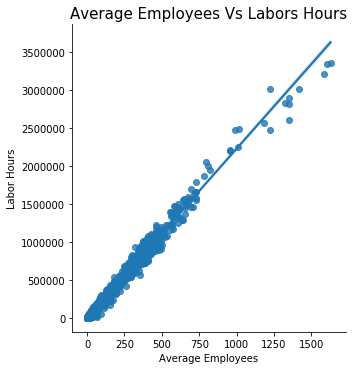

In [37]:
# Visualization of Avreage Employees against Labor Hours
sns.lmplot('Average Employees','Labor Hours',data=coal_production)
plt.title('Average Employees Vs Labors Hours',fontdict={'fontsize':15})
plt.show()

* Average Employees and labor hours are directly proportional
* Lineraly distributed with 2 to 3 possible outliers
* As the average employee increases the labor hours also increases as expected 

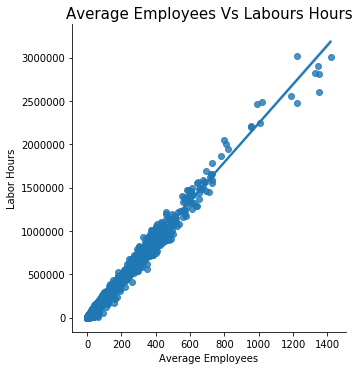

In [38]:
# Removing the outliers 
index=coal_production[coal_production['Average Employees']>1500].index
coal_production.drop(index,axis=0,inplace=True)

# Rechecking the removal of outliers by ploting in graph
sns.lmplot('Average Employees','Labor Hours',data=coal_production)
plt.title('Average Employees Vs Labours Hours',fontdict={'fontsize':15})
plt.show()

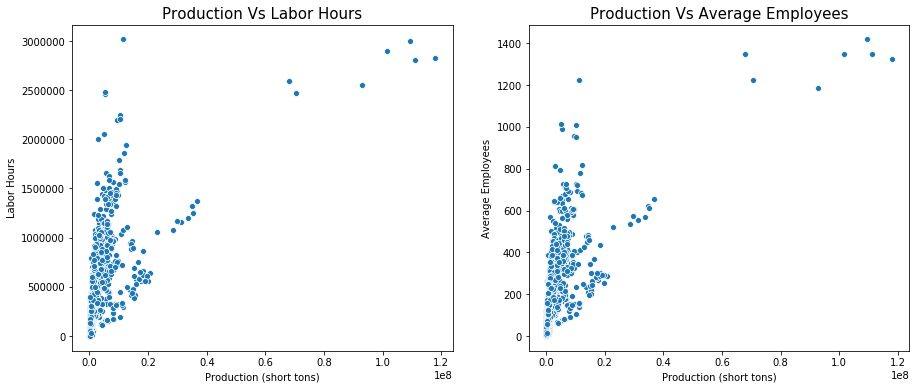

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

# Visualization of Production against Labor Hours
sns.scatterplot('Production (short tons)','Labor Hours',data=coal_production,ax=axes[0])
axes[0].set_title('Production Vs Labor Hours',fontdict={'fontsize':15})

# Visualization of Production against Average Employees
sns.scatterplot('Production (short tons)','Average Employees',data=coal_production,ax=axes[1])
axes[1].set_title('Production Vs Average Employees',fontdict={'fontsize':15})
plt.show()

* Unexpected outcome in first figure, as the labor hour increases the production does not increases much but rather limited to certain range and it is easily notable the formation of two different clusters
* The same behavior is seen in second figure, as the average employees increases the production does not increases much but rather limited to certain range and it is easily notable the formation of two different clusters 
* This kind of trend is specific to mineral extracting industries as mineral core are extracted from earth's layers and some times the results are not fruitful as it is impossible to get the exact location of the core buried inside the earth layers and also it requires much human and machine effort to extract and preprocess before letting it to the third party for direct use.
* Further analysis is needed for the observed cluster having less crowd which could be an outliers.

In [40]:
# Analysing of the less crowded cluster
coal_production[coal_production['Production (short tons)']>60000000]

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Peabody Powder River Mining Ll,"Caller Box 3035, Gillette, WY 82717",Powder River Basin,111005549,1349,2811138
1324,2014,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Peabody Powder River Mining Ll,"Caller Box 3035, Gillette, WY 82717",Powder River Basin,117965515,1325,2823533
1145,2015,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Peabody Powder River Mining Ll,"Caller Box 3035, Gillette, WY 82717",Powder River Basin,109343913,1418,3004430
963,2016,4800977,Black Thunder,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Thunder Basin Coal Company Llc,"P.O. Box 406, Wright, WY 82732",Powder River Basin,67889779,1350,2597713
970,2016,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Peabody Powder River Mining Ll,"Caller Box 3035, Gillette, WY 82717",Powder River Basin,92863811,1186,2556942
918,2017,4800977,Black Thunder,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Thunder Basin Coal Company Llc,"P.O. Box 406, Wright, WY 82732",Powder River Basin,70513365,1223,2473665
925,2017,4801353,North Antelope Rochelle Mine,Wyoming,Campbell,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,Peabody Powder River Mining Ll,"Caller Box 3035, Gillette, WY 82717",Powder River Basin,101595323,1347,2896554


* In cluster, all the points are having same attributes, therefore does not consider as an outliers.

# 2. Feature engineering

In [41]:
# Dataframe shape
coal_production.shape

(4284, 15)

In [42]:
# Getting the number of unique values of all the categorical columns 
for cat in coal_production.columns[coal_production.dtypes=='object']:
    print(cat,'->',coal_production[cat].nunique())

Mine Name -> 1410
Mine State -> 29
Mine County -> 172
Mine Status -> 5
Mine Type -> 3
Company Type -> 3
Operation Type -> 2
Operating Company -> 1055
Operating Company Address -> 984
Coal Supply Region -> 8


In [43]:
pd.set_option('display.max_rows',500) # Setting the number of display rows in output to 500

# 'Mine County' column unique values counts
coal_production['Mine County'].value_counts()

Pike                    281
Schuylkill              191
Mcdowell                164
Clearfield              158
Buchanan                133
Perry                   124
Indiana                 115
Somerset                114
Harlan                  107
Jefferson               104
Logan                   100
Boone                    90
Wise                     87
Floyd                    81
Northumberland           71
Letcher                  71
Dickenson                70
Raleigh                  69
Walker                   64
Knox                     62
Campbell                 62
Kanawha                  61
Mingo                    61
Bell                     60
Fayette                  58
Whitley                  58
Wyoming                  51
Allegany                 51
Armstrong                45
Cambria                  43
Greenbrier               40
Harrison                 40
Luzerne                  39
Garrett                  39
Greene                   35
Ohio                

* There are lots of mine county whose counts are less than 5.

In [44]:
# Setting threshold to 5, renaming those mine county whose counts are less than 5 to 'Rare'
mine_county=pd.DataFrame(coal_production['Mine County'].value_counts()<5)
mine_county=mine_county[mine_county['Mine County']==True].index.tolist()
coal_production['Mine County with rare']=coal_production['Mine County']

for var in mine_county:
    coal_production.loc[coal_production['Mine County with rare']==var,'Mine County with rare']='Rare'

coal_production.head() # Output

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Coal Supply Region,Production (short tons),Average Employees,Labor Hours,Mine County with rare
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",Appalachia Southern,56004,10,22392,Bibb
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",Appalachia Southern,28807,18,28447,Rare
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",Appalachia Southern,1440115,183,474784,Fayette
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Appalachia Southern,87587,13,29193,Franklin
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",Appalachia Southern,147499,27,46393,Franklin


In [45]:
# Rechecking the total number of unique values in Mine County column
coal_production['Mine County with rare'].nunique()

139

In [46]:
# Getting the relevant columns for ML model building
coal_prod=coal_production[['Mine State','Mine Status', 'Mine Type', 'Company Type',
                          'Operation Type','Coal Supply Region','Production (short tons)',
                          'Average Employees', 'Labor Hours','Mine County with rare']]

coal_prod.head() # Output

,Mine State,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Production (short tons),Average Employees,Labor Hours,Mine County with rare
0,Alabama,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,56004,10,22392,Bibb
1,Alabama,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,28807,18,28447,Rare
2,Alabama,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Appalachia Southern,1440115,183,474784,Fayette
3,Alabama,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,87587,13,29193,Franklin
4,Alabama,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,147499,27,46393,Franklin


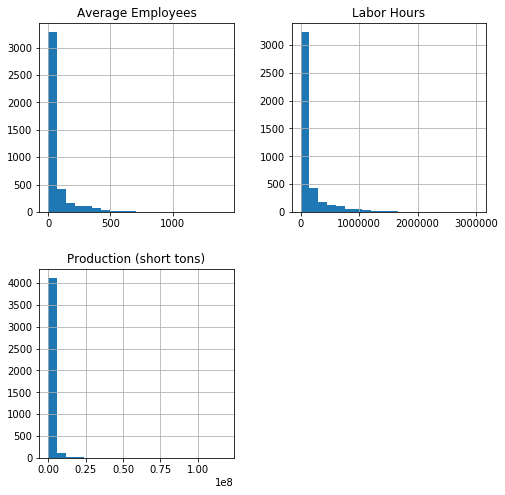

In [47]:
# Getting the distribution of continuous variables [Histogram]
coal_prod.hist(bins=20,figsize=(8,8))
plt.show()

* All of them are positively skewed 

Production (short tons)


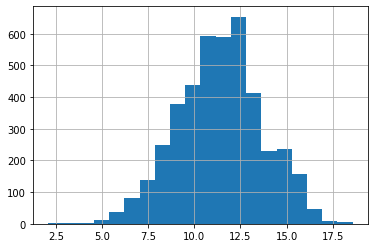

Average Employees


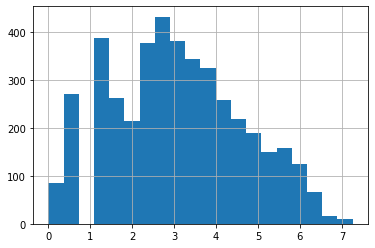

Labor Hours


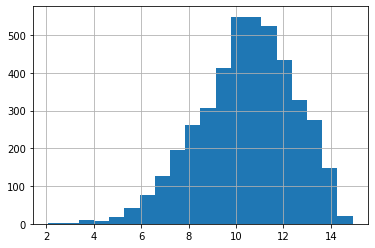

In [48]:
# Log transformation and rechecking by visualization 
for col in ['Production (short tons)', 'Average Employees', 'Labor Hours']:
    print(col)
    coal_prod['Log_'+col]=np.log(coal_prod[col])
    coal_prod['Log_'+col].hist(bins=20)
    plt.show()

# Droping columns
coal_prod=coal_prod.drop(['Production (short tons)', 'Average Employees', 'Labor Hours'],axis=1)

* All of them are normally distributed

In [49]:
# Getting dummy variables 
final_set=pd.get_dummies(coal_prod)

final_set.shape # (Rows, Columns)

(4284, 192)

# 3. Developing and implementing Machine learning models 

In [50]:
# Separating target column
X=final_set.drop('Log_Production (short tons)',axis=1) # Train
y=final_set['Log_Production (short tons)'] # Target

## 3.1 Cross Validation
#### Model Testing
* Random Forest Regressor
* Gradient Boosting Regressor
* XGB Regressor

Evaluating root mean square error 

Random Forest Regressor : 0.8021447522773479


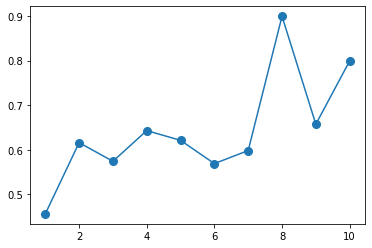

Gradient Boosting Regressor : 0.8041272547109883


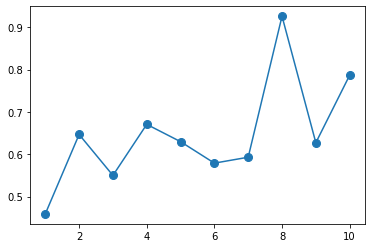

XGB Regressor : 0.7895897018480074


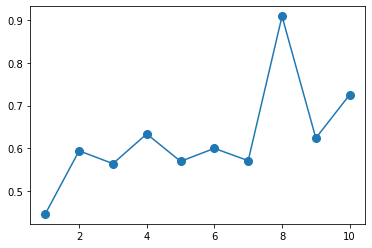

In [51]:
# Loading packages 

# Scikit learn -- Cross validation score
from sklearn.model_selection import cross_val_score 

# Scikit learn -- Random Forest Regressor and Gradient Boosting Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# XGBoost -- Extreme Gradient Boost Regressor
from xgboost import XGBRegressor

# Math -- Square root
from math import sqrt

# Creating model object, putting parameters, evaluating root mean square error and visualization
model=[RandomForestRegressor,GradientBoostingRegressor,XGBRegressor]
name=['Random Forest Regressor','Gradient Boosting Regressor','XGB Regressor']
cv=np.arange(1,11)

print('Evaluating root mean square error','\n')

for mdl,n in zip(model,name):
    mse=np.absolute(cross_val_score(mdl(n_estimators=100,random_state=101),
                                    X,
                                    y,
                                    cv=10,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1))
    
    print(str(n)+' :',sqrt(mse.mean()))
    plt.plot(cv,mse,marker='o',markersize=8)
    plt.show()

#### * Snice Xgb regressor gives the least average root mean square error, therefore we choose Xgb boost algorithm for model building.

## 3.2 Machine Learning Model : Extreme Gradient Boosting Regressor

In [52]:
# Scikit learn -- train test split
from sklearn.model_selection import train_test_split

# Spliting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (3641, 191)
y_train (3641,)
X_test (643, 191)
y_test (643,)


### 3.2.1 Model building using default parameters

In [53]:
# Model building and fitting into dataset
xgb_reg=XGBRegressor(random_state=101,verbose=1,n_job=-1)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_job=-1, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=101, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbose=1, verbosity=None)

In [54]:
# Scikit learn -- Mean square error, R-square score
from sklearn.metrics import mean_squared_error, r2_score

print('Root Mean Square Error :',sqrt(mean_squared_error(y_test,xgb_reg.predict(X_test))))
print('R square score :',r2_score(y_test,xgb_reg.predict(X_test)))

Root Mean Square Error : 0.7724259081122175
R square score : 0.8859696826855755


### 3.2.2 Tuning Hyper parameters

In [55]:
# Scikit learn -- Grid search CV
from sklearn.model_selection import GridSearchCV

# Setting range for hyper parameters tuning
xgb_reg_hp=XGBRegressor(random_state=101)
param_grid=dict(n_estimators=np.arange(100,160,10),
                eta=[0.08,0.1,0.12],
                max_depth=[4,6,8],
                subsample=[0.8,0.9,1])

# Building Grid search model
grid_search=GridSearchCV(estimator=xgb_reg_hp,
                         param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         verbose=-1)

# Fitting the train set
grid_search.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 77.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [56]:
# Getting best parameters 
grid_search.best_params_

{'eta': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1}

In [57]:
print('Root Mean Square Error :',sqrt(mean_squared_error(y_test,grid_search.predict(X_test))))
print('R square value :',r2_score(y_test,grid_search.predict(X_test)))

Root Mean Square Error : 0.7492122006847867
R square value : 0.892720596313319


* Root mean square error has decreased to 0.749
* R-square has increased to 0.892
* Therefore getting out the best parameters 

 #### The best parameters are:
 * Total number of tree in each iteration : 150
 * Learning rate : 0.1
 * Maximum depth of the Tree : 6
 * No sub sampling of the data set is best 

### 3.2.3 Model building using best parameters and training it for the whole dataset

In [58]:
# Rebuilding the model using best parameters
xgb_reg2=XGBRegressor(n_estimators=150,
                      eta=0.1,
                      max_depth=6,
                      subsample=1,
                      random_state=101,
                      verbose=1,
                      n_job=-1)

# Model fitting 
xgb_reg2.fit(X,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=150, n_job=-1, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=101, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbose=1, verbosity=None)

# 4. Prediction and Evaluation

##### Now before predicting coal production for year 2018, the dataset should be preprocessed

In [59]:
# Removing samples having zero coal production
test=test[test['Production (short tons)']>0]
test.reset_index(drop=True, inplace=True)
test.shape # (rows, columns)

(679, 16)

In [60]:
# Droping irrelevant columns
test=test.drop(['Year', 'MSHA ID', 'Mine Name', 'Operating Company', 'Operating Company Address', 'Union Code'],axis=1)
test.head()

,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,113221,16,38882
1,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,278489,43,122091
2,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Mine only,Appalachia Southern,1497321,446,869485
3,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,Mine and Preparation Plant,Appalachia Southern,5597175,863,2211196
4,Alabama,Jefferson,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,220827,37,94817


In [61]:
# Checking missing values
test.isnull().any()

Mine State                 False
Mine County                False
Mine Status                False
Mine Type                  False
Company Type               False
Operation Type             False
Coal Supply Region         False
Production (short tons)    False
Average Employees          False
Labor Hours                False
dtype: bool

* No missing values

In [62]:
# Checking the count of unique values in Mine County column
test['Mine County'].value_counts()

Pike              40
Mcdowell          31
Schuylkill        30
Clearfield        24
Logan             23
Somerset          22
Perry             19
Jefferson         18
Wise              18
Buchanan          18
Harlan            16
Fayette           15
Indiana           15
Raleigh           14
Wyoming           13
Walker            13
Boone             13
Northumberland    13
Whitley           13
Campbell          12
Dickenson         11
Mingo             11
Greenbrier        10
Bell               9
Luzerne            8
Allegany           8
Kanawha            8
Floyd              8
Knox               7
Cambria            7
Harrison           6
Leslie             6
Garrett            6
Armstrong          6
Daviess            6
Mercer             5
Warrick            5
Knott              5
Randolph           5
Greene             5
Marion             4
Johnson            4
Nicholas           4
Gibson             4
Lawrence           4
Carbon             4
Tazewell           4
Saline       

* There are lots of variable whose counts are less than 5 

In [63]:
# Encoding less count variable with 'Rare', by keeping threshold to 5
test['Mine County with rare']=test['Mine County']

for var in mine_county:
    test.loc[test['Mine County with rare']==var,'Mine County with rare']='Rare'

test.head() # Output

,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Production (short tons),Average Employees,Labor Hours,Mine County with rare
0,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,113221,16,38882,Bibb
1,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,278489,43,122091,Jefferson
2,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Mine only,Appalachia Southern,1497321,446,869485,Jefferson
3,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,Mine and Preparation Plant,Appalachia Southern,5597175,863,2211196,Jefferson
4,Alabama,Jefferson,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,220827,37,94817,Jefferson


In [64]:
# Droping Mine County column
test.drop('Mine County',axis=1,inplace=True)

# Checking the final total number of unique values in Mine County with rare column
test['Mine County with rare'].nunique()

130

In [65]:
# count of all the unique values in categorical columns
for var in test.columns[test.dtypes=='object']:
    print(var,':',test[var].nunique())

Mine State : 27
Mine Status : 5
Mine Type : 3
Company Type : 3
Operation Type : 2
Coal Supply Region : 8
Mine County with rare : 130


In [66]:
# Getting the unique values of categorical columns having count of unique values less than 27, for cross checking purpose
for var in test.columns[test.dtypes=='object']:
    if test[var].nunique()<27:
        print(var,':',test[var].unique(),'\n')

Mine Status : ['Active, men working, not producing' 'Active' 'Permanently abandoned'
 'Temporarily closed' 'New, under construction'] 

Mine Type : ['Surface' 'Underground' 'Refuse'] 

Company Type : ['Indepedent Producer Operator' 'Operating Subsidiary' 'Contractor'] 

Operation Type : ['Mine only' 'Mine and Preparation Plant'] 

Coal Supply Region : ['Appalachia Southern' 'Western' 'Uinta Region' 'Illinois Basin'
 'Appalachia Central' 'Interior' 'Appalachia Northern'
 'Powder River Basin'] 



* Mine Status, Mine Type, Company Type and Operation Type columns are having same variables as in train set, therefore no need to cross check
* Coal Supply Region, Mine County with rare and Mine state columns need to be cross check as there are lots of variable 

In [67]:
# Checking Mine State column variables in test dataset
state1=coal_production['Mine State'].unique().tolist() # Getting variables of train set
state2=test['Mine State'].unique().tolist() # Getting variables of test set

if set(state2).issubset(state1):
    print('Yes, all the states in test dataset is there in train dataset')
else:
    print('No, there are some states missing in test dataset')

Yes, all the states in test dataset is there in train dataset


In [68]:
# Getting those States which are not in test dataset
missing_state=np.setdiff1d(state1,state2).tolist()
missing_state

['Arkansas', 'Kansas']

In [69]:
# Checking Mine County with rare column variables in test dataset
mine1=coal_production['Mine County with rare'].unique().tolist() # Getting variables of train set
mine2=test['Mine County with rare'].unique().tolist() # Getting variables of test set

if set(state2).issubset(state1):
    print('Yes, all the Mine County in test dataset is there in train dataset')
else:
    print('No, there are some Mine County missing in test dataset')

Yes, all the Mine County in test dataset is there in train dataset


In [70]:
# Getting those Mine county which are not in test dataset
missing_county=np.setdiff1d(mine1,mine2).tolist()
missing_county

['Carroll',
 'Elk',
 'Freestone',
 'Haskell',
 'Kemper',
 'Montrose',
 'Nowata',
 'Sebastian',
 'Upshur',
 'Winston']

In [71]:
# Checking Coal Supply Region column variables in test dataset
coal_sply_rgn=coal_production['Coal Supply Region'].unique().tolist() # Getting variables of train set
coal_sply_rgn=test['Coal Supply Region'].unique().tolist() # Getting variables of test set

if set(state2).issubset(state1):
    print('Yes, all the Coal Supply Region in test dataset is there in train dataset')
else:
    print('No, there are some Coal Supply Region missing in test dataset')

Yes, all the Coal Supply Region in test dataset is there in train dataset


In [72]:
# Log transformation of the Average Employees and Labor Hours columns
test['Log_Average Employees']=np.log(test['Average Employees'])
test['Log_Labor Hours']=np.log(test['Labor Hours'])

# Droping Average Employees and Labor Hours columns
test.drop(['Average Employees', 'Labor Hours'],axis=1,inplace=True)

# Making separate set for coal production and then droping it from test dataset
production=test['Production (short tons)']
test.drop('Production (short tons)', axis=1, inplace=True)

test.head() # Output

,Mine State,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Mine County with rare,Log_Average Employees,Log_Labor Hours
0,Alabama,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Bibb,2.77,10.57
1,Alabama,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Jefferson,3.76,11.71
2,Alabama,Active,Underground,Operating Subsidiary,Mine only,Appalachia Southern,Jefferson,6.10,13.68
3,Alabama,Active,Underground,Indepedent Producer Operator,Mine and Preparation Plant,Appalachia Southern,Jefferson,6.76,14.61
4,Alabama,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Jefferson,3.61,11.46


In [73]:
# Getting dummy variables 
final_test=pd.get_dummies(test)
final_test.shape # (rows, columns)

(679, 180)

* There are 191 columns in train set and here in test there are only 180, so need to fill missing columns by 0

In [74]:
# Getting the missing columns 
train_col=X.columns.tolist() # train columns 
test_col=final_test.columns.tolist() # test columns 

missing_col=np.setdiff1d(train_col,test_col).tolist()
missing_col

['Mine County with rare_Carroll',
 'Mine County with rare_Elk',
 'Mine County with rare_Freestone',
 'Mine County with rare_Haskell',
 'Mine County with rare_Kemper',
 'Mine County with rare_Montrose',
 'Mine County with rare_Nowata',
 'Mine County with rare_Sebastian',
 'Mine County with rare_Upshur',
 'Mine County with rare_Winston',
 'Mine State_Arkansas',
 'Mine State_Kansas']

In [75]:
# Adding missing columns 
for col in missing_col:
    final_test[col]=0

# Selecting all the columns train dataset have
final_test=final_test[X.columns.tolist()]

final_test.shape # (rows, columns)

(679, 191)

In [76]:
# Coal prediction
predict=xgb_reg2.predict(final_test).tolist()
prediction2018=pd.DataFrame(np.exp(predict))
prediction2018.rename(columns={0:'Prediction of coal production'}, inplace=True)

# Concatenating Test, Production and Prediction dataset
prediction2018=pd.concat([test, production, prediction2018], axis=1)

# Anti-log transformation
prediction2018['Average Employees']=np.exp(prediction2018['Log_Average Employees'])
prediction2018['Labor Hours']=np.exp(prediction2018['Log_Labor Hours'])

# Droping Log_Average Employees and Log_Labor Hours columns 
prediction2018.drop(['Log_Average Employees', 'Log_Labor Hours'], axis=1, inplace=True)

prediction2018.head() # Output

,Mine State,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Mine County with rare,Production (short tons),Prediction of coal production,Average Employees,Labor Hours
0,Alabama,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Bibb,113221,99203.88,16.00,38882.00
1,Alabama,Active,Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Jefferson,278489,260168.99,43.00,122091.00
2,Alabama,Active,Underground,Operating Subsidiary,Mine only,Appalachia Southern,Jefferson,1497321,2217372.67,446.00,869485.00
3,Alabama,Active,Underground,Indepedent Producer Operator,Mine and Preparation Plant,Appalachia Southern,Jefferson,5597175,3869612.51,863.00,2211196.00
4,Alabama,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,Appalachia Southern,Jefferson,220827,159842.17,37.00,94817.00


In [77]:
# Saving the predicted outcomes
prediction2018.to_csv('2018_coal_production_prediction.csv')

In [78]:
print('Root Mean Square Error :',sqrt(mean_squared_error(prediction2018['Production (short tons)'],
                                                         prediction2018['Prediction of coal production'])))
      
print('R square score :',r2_score(prediction2018['Production (short tons)'],
                                  prediction2018['Prediction of coal production']))

Root Mean Square Error : 977691.8090766027
R square score : 0.9643139495505691


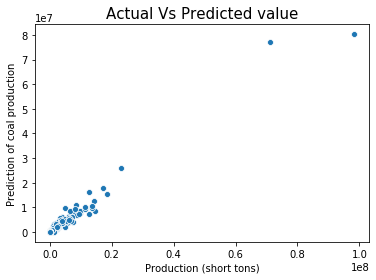

In [79]:
sns.scatterplot(prediction2018['Production (short tons)'],prediction2018['Prediction of coal production'])
plt.title('Actual Vs Predicted value', fontdict={'fontsize':15})
plt.show()

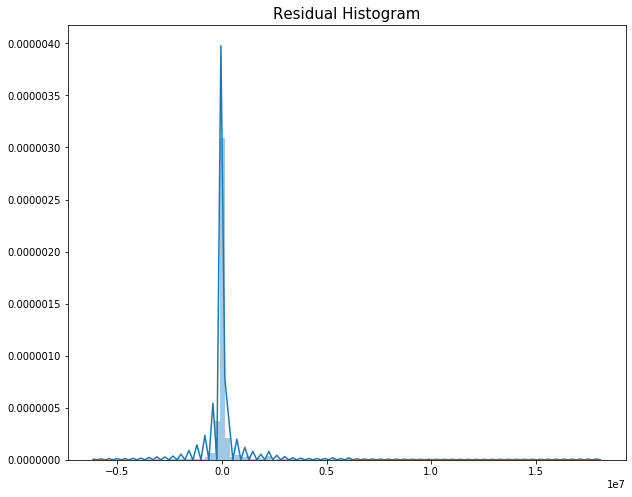

In [80]:
# Residual Histogram
plt.figure(figsize=(10,8))
sns.distplot(prediction2018['Production (short tons)']-prediction2018['Prediction of coal production'],bins=100)
plt.title('Residual Histogram', fontdict={'fontsize':15})
plt.show()

##### The model has very good r square value but also very high root mean square value. It shows that there are lots of attributes which influence the coal production and need to consider for better machine learning model 

###### Thank you 
###### ~ PRASHANT LAL